# Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,GridSearchCV,LeaveOneOut,cross_val_predict
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy.stats import pearsonr
from sklearn.decomposition import PCA

In [2]:
load_label_path = '/Volumes/GoogleDrive/Mi unidad/PhD_Thesis/Data/GIGA/2Class/'

#data = pickle.load(open(load_label_path+'data_rest_2022.pkl', 'rb'))
data = pickle.load(open(load_label_path+'data_r0_2022.pkl', 'rb'))

# Figs: accuracy

In [3]:
data['target'] = data['target'].astype({'Subjects': 'int32'})

In [4]:
acc = data['target']
acc.sort_values(by='2.0',inplace=True, ascending=False,ignore_index=True)
ACC = acc.melt(id_vars=['Subjects'], value_vars=['2.0','1.5','1.0','0.5'], var_name='win_length', value_name='accuracy')

In [5]:
ACC

,Subjects,win_length,accuracy
0,43,2.0,100.000000
1,5,2.0,100.000000
2,37,2.0,100.000000
3,14,2.0,100.000000
4,41,2.0,100.000000
...,...,...,...
191,42,0.5,80.000000
192,8,0.5,80.000000
193,51,0.5,79.523810
194,17,0.5,79.523810


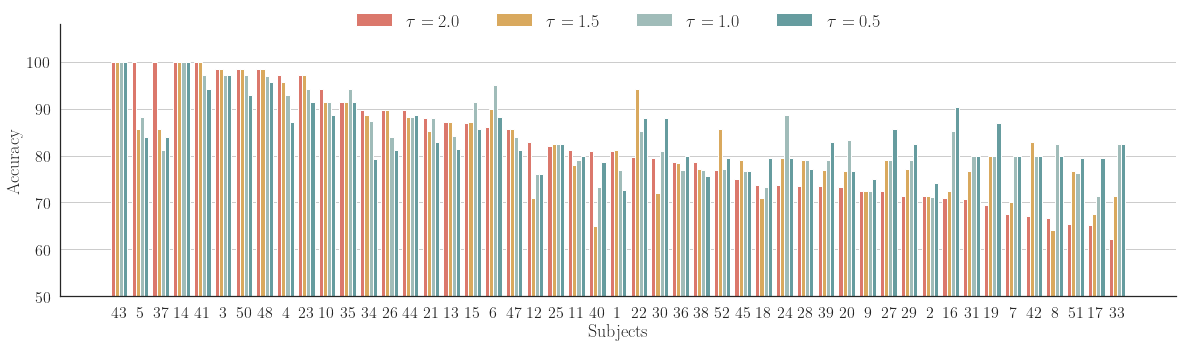

In [6]:
img_path = '/Volumes/GoogleDrive/Mi unidad/PhD_Thesis/Figs/GIGA/2Class/'
fs = 18
fs_tkz = 16
plt.figure(figsize=(20,5))
sns.set(style='white')
plt.rc('text', usetex=True)
plt.rc('font', family='Computer Modern Roman')
plt.rc('font', size=fs)
#colors = ["#CACAAA", "#EEC584", '#C8AB83', '#55868C', '#7F636E']
#colors = ["#ED6A5A", "#EDAE49", '#9BC1BC', '#5CA4A9', '#2F4858']
#colors = ["#ED6A5A", "#EDAE49", '#9BC1BC', '#5CA4A9', '#114B5F']
colors = ["#ED6A5A", "#EDAE49", '#9BC1BC', '#5CA4A9', '#114B5F']
customPalette = sns.set_palette(sns.color_palette(colors))
ax = sns.barplot(x="Subjects", y="accuracy", hue='win_length', data=ACC, order=acc['Subjects'], palette=customPalette)
ax.set_axisbelow(True)
plt.grid(True,axis='y')
plt.xlabel('Subjects', fontsize=fs)
plt.ylabel('Accuracy', fontsize=fs)
h, l = ax.get_legend_handles_labels()
ax.legend(h,[r'$\tau = 2.0$', r'$\tau = 1.5$', r'$\tau = 1.0$', r'$\tau = 0.5$'], loc='upper center', ncol=5, bbox_to_anchor =(0.5,1.1), fontsize=fs, frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks(np.linspace(50,100,6),np.linspace(50,100,6,dtype=int),fontsize=fs_tkz)
plt.xticks(fontsize=fs_tkz)
plt.axis('tight')
plt.ylim([50,108])
#plt.savefig(img_path+'acc_train.svg', bbox_inches='tight', format='svg', dpi = 300)
#plt.savefig(img_path+'acc_train.eps', bbox_inches='tight', format='eps', dpi = 300)
plt.show()

# Experiment extended: Resting state

For 2Ch: [0,*,2,*,*,*,6,*,8,*,*,*,12,*,14,*,*,*]

## Linear

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
X = data['X']
ch = [0,2,6,8,12,14]#[0,*,2,*,*,*,6,*,8,*,*,*,12,*,14,*,*,*]
X = [X[i] for i in ch]
target = data['target']

In [18]:
save_path = '/Volumes/GoogleDrive/Mi unidad/PhD_Thesis/Results/GIGA/2Class/Paper1/Resting_State/'

In [19]:
targets = target.loc[:,['2.0', '1.5', '1.0', '0.5']]
pca = PCA(n_components=1)
targets = targets.assign(Mean=lambda x: x.mean(axis=1), PCA=lambda x: pca.fit_transform(x))

In [20]:
Rs = {}

for wn in targets.keys():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
        ])

    y = StandardScaler().fit_transform(targets[wn].to_numpy().reshape(-1,1)).ravel()

    ypred = cross_val_predict(pipeline, np.concatenate(X,axis=-1), y, cv=LeaveOneOut(),verbose=1)

    r = pearsonr(ypred,y)

    print('Window: {}  r: {}'.format(wn,r))

    Rs[wn] = r

    pickle.dump(Rs,open(save_path+'linear_2Ch.pkl', 'wb'))
    


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.5s finished


Window: 2.0  r: (0.03517726641629767, 0.8103625835189983)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Window: 1.5  r: (-0.004032241751146247, 0.9780632294251228)


[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Window: 1.0  r: (-0.1621193398049512, 0.2657423005388633)


[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Window: 0.5  r: (-0.1350873856435416, 0.35473077861648894)


[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Window: Mean  r: (-0.022830287027781924, 0.8762642717432552)
Window: PCA  r: (-0.009390525350530381, 0.948939881499635)


[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.5s finished


In [21]:
Rs

{'2.0': (0.03517726641629767, 0.8103625835189983),
 '1.5': (-0.004032241751146247, 0.9780632294251228),
 '1.0': (-0.1621193398049512, 0.2657423005388633),
 '0.5': (-0.1350873856435416, 0.35473077861648894),
 'Mean': (-0.022830287027781924, 0.8762642717432552),
 'PCA': (-0.009390525350530381, 0.948939881499635)}

## LASSO

In [22]:
from sklearn.linear_model import Lasso

In [23]:
X = data['X']
ch = [0,2,6,8,12,14]#[0,*,2,*,*,*,6,*,8,*,*,*,12,*,14,*,*,*]
X = [X[i] for i in ch]
target = data['target']

In [25]:
save_path = '/Volumes/GoogleDrive/Mi unidad/PhD_Thesis/Results/GIGA/2Class/Paper1/Resting_State/'

In [26]:
targets = target.loc[:,['2.0', '1.5', '1.0', '0.5']]
pca = PCA(n_components=1)
targets = targets.assign(Mean=lambda x: x.mean(axis=1), PCA=lambda x: pca.fit_transform(x))

In [27]:
Rs = {}

for wn in targets.keys():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', Lasso(alpha=1e-3, max_iter=int(1e5)))
        ])

    y = StandardScaler().fit_transform(targets[wn].to_numpy().reshape(-1,1)).ravel()

    ypred = cross_val_predict(pipeline, np.concatenate(X,axis=-1), y, cv=LeaveOneOut(),verbose=1)

    r = pearsonr(ypred,y)

    print('Window: {}  r: {}'.format(wn,r))

    Rs[wn] = r

    pickle.dump(Rs,open(save_path+'lasso_2Ch.pkl', 'wb'))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Window: 2.0  r: (-0.19263228087228015, 0.18481491815778864)


[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    9.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Window: 1.5  r: (-0.0930036343501276, 0.5250378598549144)


[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:   12.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Window: 1.0  r: (-0.36649796831909737, 0.009595694700465394)


[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    6.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Window: 0.5  r: (-0.11902120932885829, 0.41533463667317655)


[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    8.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Window: Mean  r: (-0.11578640099621273, 0.42821412526206604)
Window: PCA  r: (-0.12269451429921972, 0.4009814309282686)


[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    9.3s finished


In [28]:
Rs

{'2.0': (-0.19263228087228015, 0.18481491815778864),
 '1.5': (-0.0930036343501276, 0.5250378598549144),
 '1.0': (-0.36649796831909737, 0.009595694700465394),
 '0.5': (-0.11902120932885829, 0.41533463667317655),
 'Mean': (-0.11578640099621273, 0.42821412526206604),
 'PCA': (-0.12269451429921972, 0.4009814309282686)}

## Ridge

In [29]:
from sklearn.linear_model import Ridge

In [30]:
X = data['X']
ch = [0,2,6,8,12,14]#[0,*,2,*,*,*,6,*,8,*,*,*,12,*,14,*,*,*]
X = [X[i] for i in ch]
target = data['target']

In [31]:
save_path = '/Volumes/GoogleDrive/Mi unidad/PhD_Thesis/Results/GIGA/2Class/Paper1/Resting_State/'

In [32]:
targets = target.loc[:,['2.0', '1.5', '1.0', '0.5']]
pca = PCA(n_components=1)
targets = targets.assign(Mean=lambda x: x.mean(axis=1), PCA=lambda x: pca.fit_transform(x))

In [33]:
Rs = {}

for wn in targets.keys():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', Ridge(alpha=1e-3, max_iter=int(1e5)))
        ])

    y = StandardScaler().fit_transform(targets[wn].to_numpy().reshape(-1,1)).ravel()

    ypred = cross_val_predict(pipeline, np.concatenate(X,axis=-1), y, cv=LeaveOneOut(),verbose=1)

    r = pearsonr(ypred,y)

    print('Window: {}  r: {}'.format(wn,r))

    Rs[wn] = r

    pickle.dump(Rs,open(save_path+'ridge_2Ch.pkl', 'wb'))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Window: 2.0  r: (0.035359075830905265, 0.8094006756266431)
Window: 1.5  r: (-0.0034392944073175966, 0.9812884435714712)


[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Window: 1.0  r: (-0.16130971608940778, 0.2681690111955654)
Window: 0.5  r: (-0.1338682743314967, 0.3591301630715585)
Window: Mean  r: (-0.022183588315929825, 0.8797430725277804)
Window: PCA  r: (-0.008803249391372302, 0.9521293062659689)


[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.1s finished


In [34]:
Rs

{'2.0': (0.035359075830905265, 0.8094006756266431),
 '1.5': (-0.0034392944073175966, 0.9812884435714712),
 '1.0': (-0.16130971608940778, 0.2681690111955654),
 '0.5': (-0.1338682743314967, 0.3591301630715585),
 'Mean': (-0.022183588315929825, 0.8797430725277804),
 'PCA': (-0.008803249391372302, 0.9521293062659689)}

## Elastic Net

In [35]:
from sklearn.linear_model import ElasticNet

In [36]:
X = data['X']
ch = [0,2,6,8,12,14]#[0,*,2,*,*,*,6,*,8,*,*,*,12,*,14,*,*,*]
X = [X[i] for i in ch]
target = data['target']

In [37]:
save_path = '/Volumes/GoogleDrive/Mi unidad/PhD_Thesis/Results/GIGA/2Class/Paper1/Resting_State/'

In [38]:
targets = target.loc[:,['2.0', '1.5', '1.0', '0.5']]
pca = PCA(n_components=1)
targets = targets.assign(Mean=lambda x: x.mean(axis=1), PCA=lambda x: pca.fit_transform(x))

In [41]:
Rs = {}

for wn in targets.keys():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', ElasticNet(alpha=1, l1_ratio=1e-3, max_iter=int(1e5)))
        ])

    y = StandardScaler().fit_transform(targets[wn].to_numpy().reshape(-1,1)).ravel()

    ypred = cross_val_predict(pipeline, np.concatenate(X,axis=-1), y, cv=LeaveOneOut(),verbose=100,n_jobs=3)

    r = pearsonr(ypred,y)

    print('Window: {}  r: {}'.format(wn,r))

    Rs[wn] = r

    pickle.dump(Rs,open(save_path+'elasticnet_2Ch.pkl', 'wb'))

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Batch computation too fast (0.0156s.) Setting batch_size=2.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Batch computation too fast (0.0265s.) Setting batch_size=4.
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  2

/Users/julian/miniforge3/envs/MI_pred/lib/python3.9/site-packages/sklearn/pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julian/miniforge3/envs/MI_pred/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/julian/miniforge3/envs/MI_pred/lib/python3.9/site-packages/sklearn/pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julian/miniforge3/envs/MI_pred/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected res

[Parallel(n_jobs=3)]: Done  49 out of  49 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  49 out of  49 | elapsed:    0.1s finished
Window: 1.5  r: (0.04973171110398411, 0.7343496925978167)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Batch computation too fast (0.0061s.) Setting batch_size=2.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Batch computation too fast (0.0127s.) Setting batch_size=4.
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.0s
[Par

/Users/julian/miniforge3/envs/MI_pred/lib/python3.9/site-packages/sklearn/pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julian/miniforge3/envs/MI_pred/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/julian/miniforge3/envs/MI_pred/lib/python3.9/site-packages/sklearn/pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julian/miniforge3/envs/MI_pred/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected res

[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Batch computation too fast (0.0214s.) Setting batch_size=8.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  39 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  43 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  45 out of  49 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  46 out of  49 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=3)]: Done

/Users/julian/miniforge3/envs/MI_pred/lib/python3.9/site-packages/sklearn/pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julian/miniforge3/envs/MI_pred/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/julian/miniforge3/envs/MI_pred/lib/python3.9/site-packages/sklearn/pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julian/miniforge3/envs/MI_pred/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected res

In [40]:
Rs

{'2.0': (0.08946377279687044, 0.5409960415260929),
 '1.5': (0.0173036487337171, 0.9060617846923732),
 '1.0': (-0.14526963130768814, 0.31928320096165486),
 '0.5': (-0.16008977266713345, 0.2718533278173822),
 'Mean': (0.0016248762077968376, 0.9911592162527211),
 'PCA': (0.022188263844256106, 0.879717913210493)}

## SVR

In [56]:
from sklearn.svm import SVR

In [57]:
X = data['X']
ch = [0,2,6,8,12,14]#[0,*,2,*,*,*,6,*,8,*,*,*,12,*,14,*,*,*]
X = [X[i] for i in ch]
target = data['target']

In [58]:
save_path = '/Volumes/GoogleDrive/Mi unidad/PhD_Thesis/Results/GIGA/2Class/Paper1/Resting_State/'

In [59]:
targets = target.loc[:,['2.0', '1.5', '1.0', '0.5']]
pca = PCA(n_components=1)
targets = targets.assign(Mean=lambda x: x.mean(axis=1), PCA=lambda x: pca.fit_transform(x))

In [60]:
Rs = {}

for wn in targets.keys():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', SVR(C=1e-2))
        ])

    y = StandardScaler().fit_transform(targets[wn].to_numpy().reshape(-1,1)).ravel()

    ypred = cross_val_predict(pipeline, np.concatenate(X,axis=-1), y, cv=LeaveOneOut(),verbose=100)

    r = pearsonr(ypred,y)

    print('Window: {}  r: {}'.format(wn,r))

    Rs[wn] = r

    pickle.dump(Rs,open(save_path+'svr_2Ch.pkl', 'wb'))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

In [61]:
Rs

{'2.0': (-0.894422966656774, 4.835476026509808e-18),
 '1.5': (-0.8517616482613595, 8.625660479322839e-15),
 '1.0': (-0.8563729158346813, 4.3295023826151774e-15),
 '0.5': (-0.6379772937159851, 8.18842498008374e-07),
 'Mean': (-0.8854810409846721, 2.9514317853175865e-17),
 'PCA': (-0.8518100287025671, 8.56454375858021e-15)}

In [ ]:
#

# Experiment extended: R0

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
X = data['X']
#ch = [0,2,6,8,12,14]#[0,*,2,*,*,*,6,*,8,*,*,*,12,*,14,*,*,*]
#X = [X[i] for i in ch]
target = data['target']

In [9]:
save_path = '/Volumes/GoogleDrive/Mi unidad/PhD_Thesis/Results/GIGA/2Class/Paper1/R0/'

In [10]:
targets = target.loc[:,['2.0', '1.5', '1.0', '0.5']]
pca = PCA(n_components=1)
targets = targets.assign(Mean=lambda x: x.mean(axis=1), PCA=lambda x: pca.fit_transform(x))

In [11]:
Rs = {}

for wn in targets.keys():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
        ])

    y = StandardScaler().fit_transform(targets[wn].to_numpy().reshape(-1,1)).ravel()

    ypred = cross_val_predict(pipeline, np.concatenate(X,axis=-1), y, cv=LeaveOneOut(),verbose=1)

    r = pearsonr(ypred,y)

    print('Window: {}  r: {}'.format(wn,r))

    Rs[wn] = r

    pickle.dump(Rs,open(save_path+'linear_6Ch.pkl', 'wb'))
    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.9s finished


Window: 2.0  r: (-0.04708646806940706, 0.7480022320686271)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Window: 1.5  r: (0.029714967624328206, 0.8393853507340973)


[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Window: 1.0  r: (0.13726252933910058, 0.3469635896664956)


[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Window: 0.5  r: (0.11378553261013735, 0.4362918923209461)


[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Window: Mean  r: (0.07446833893222571, 0.6110827807024709)
Window: PCA  r: (0.06130812938339203, 0.6756019457010819)


[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.9s finished


In [12]:
Rs

{'2.0': (-0.04708646806940706, 0.7480022320686271),
 '1.5': (0.029714967624328206, 0.8393853507340973),
 '1.0': (0.13726252933910058, 0.3469635896664956),
 '0.5': (0.11378553261013735, 0.4362918923209461),
 'Mean': (0.07446833893222571, 0.6110827807024709),
 'PCA': (0.06130812938339203, 0.6756019457010819)}